# Heuristic Evaluations

In [1]:
import blocksci
import blocksci.cluster_python
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
from copy import deepcopy
from tqdm import tqdm_notebook
from collections import defaultdict
%matplotlib notebook

In [ ]:
# Load Bitcoin clusters
clusters_fp_0 = blocksci.cluster_python.ClusterManager("/home/abdallah/bitcoin-data/clusters_h2_fp_0/")

In [ ]:
# Compute FP Count
fp_count = 0
tot_count = 0
for clstr in clusters_fp_0.clusters():
    if len(clstr.scripts) > 1: 
        clstr_scripts = clstr.scripts
        for i in range(0,len(clstr.scripts)):
            if len(clstr_scripts[i].in_txes()) > 1:
                fp_count += 1
            tot_count +=1
    else :
        tot_count+=1

In [ ]:
clusters_h1 = blocksci.cluster_python.ClusterManager("/home/abdallah/bitcoin-data/clusters_h1/")

In [11]:
clusters_h2 = blocksci.cluster_python.ClusterManager("/home/abdallah/bitcoin-data/clusters/")

In [2]:
chain = blocksci.Blockchain("/home/abdallah/bitcoin-data")

In [ ]:
ltc_chain = blocksci.Blockchain("/home/abdallah/litecoin-data")

In [ ]:
# pay-to-public-key-hash
addrs = blocksci.Address.with_prefix('1')[:10]

In [ ]:
ltc_addrs = blocksci.Address.address_count()

In [ ]:
multisigaddr = blocksci.Address.with_prefix('3')

In [ ]:
print(blocksci.heuristics.unique_change_by_address_reuse(chain[0][0]))

# Cluster filtering

In [ ]:
clusters_h2.cluster_with_address(addrs[0]).scripts[0].script = 0

# Evaluating Heuristics

In [ ]:
# Get Change Addresses
change_addrs = dict()

for block in tqdm_notebook(chain[:-10]):
    for tx in block:
        if (not tx.is_coinbase) and (not blocksci.heuristics.is_coinjoin(tx)):
            if blocksci.heuristics.unique_change_by_address_reuse(tx) is None:# change_by_address_reuse(tx)
#                 out = blocksci.heuristics.unique_change_by_client_change_address_behavior(tx)
                out = blocksci.heuristics.unique_change_by_client_change_address_behavior_legacy(tx)
#                 out = blocksci.heuristics.unique_change_by_locktime(tx)
#                 out = blocksci.heuristics.unique_change_by_optimal_change(tx)
#                 out = blocksci.heuristics.unique_change_by_peeling_chain(tx)
#                 out = blocksci.heuristics.unique_change_by_power_of_ten_value(tx)
#                 out = blocksci.heuristics.unique_change_by_script_type(tx)
                if out is not None:
                    if out.address not in change_addrs:
                        change_addrs[out.address] = 1
                    else:
                        change_addrs[out.address] = change_addrs[out.address] + 1

In [ ]:
len(change_addrs)

In [ ]:
# Get Change Addresses
change_addrs_main_h0 = dict()
change_addrs_main_h1 = dict()
change_addrs_main_h2 = dict()

for block in tqdm_notebook(ltc_chain[:-10]):
    for tx in block:
        if (not tx.is_coinbase) and (not blocksci.heuristics.is_coinjoin(tx)):
            if blocksci.heuristics.unique_change_by_address_reuse(tx) is None:# change_by_address_reuse(tx)
#                 out = blocksci.heuristics.unique_change_by_client_change_address_behavior(tx)
                out1 = blocksci.heuristics.unique_change_by_client_change_address_behavior_legacy(tx)
#                 out = blocksci.heuristics.unique_change_by_locktime(tx)
#                 out = blocksci.heuristics.unique_change_by_optimal_change(tx)
                out2 = blocksci.heuristics.unique_change_by_peeling_chain(tx)
#                 out = blocksci.heuristics.unique_change_by_power_of_ten_value(tx)
                out3 = blocksci.heuristics.unique_change_by_script_type(tx)
                if out1 is not None:
                    if out1.address not in change_addrs_main_h0:
                        change_addrs_main_h0[out1.address] = 1
                    else:
                        change_addrs_main_h0[out1.address] = change_addrs_main_h0[out1.address] + 1
                if out2 is not None:
                    if out2.address not in change_addrs_main_h1:
                        change_addrs_main_h1[out2.address] = 1
                    else:
                        change_addrs_main_h1[out2.address] = change_addrs_main_h1[out2.address] + 1
                if out3 is not None:
                    if out3.address not in change_addrs_main_h2:
                        change_addrs_main_h2[out3.address] = 1
                    else:
                        change_addrs_main_h2[out3.address] = change_addrs_main_h2[out3.address] + 1

In [ ]:
len(change_addrs_main_h0), len(change_addrs_main_h1), len(change_addrs_main_h2)

In [ ]:
# Get addresses in common regardless of definition and so FP
len(list(set(change_addrs_main_h0.keys()) & set(change_addrs_main_h1.keys())))

In [ ]:
# Get addresses in common regardless of definition and so FP
len(list(set(change_addrs_main_h0.keys()) & set(change_addrs_main_h2.keys())))

In [ ]:
# Get addresses in common regardless of definition and so FP
len(list(set(change_addrs_main_h1.keys()) & set(change_addrs_main_h2.keys())))

In [ ]:
# Get addresses that are true to the definition (one input and more)
h0 = [addr for addr in change_addrs_main_h0 if addr.in_txes_count() == 1]
h1 = [addr for addr in change_addrs_main_h1 if addr.in_txes_count() == 1]
h2 = [addr for addr in change_addrs_main_h2 if addr.in_txes_count() == 1]

In [ ]:
len(list(set(h0) & set(h1)))

In [ ]:
len(list(set(h1) & set(h2)))

In [ ]:
len(h2)

In [ ]:
blocksci.Address.with_prefix('1dice')

In [ ]:
in_t

In [ ]:
i =0 
for addr in change_addrs:
    print(addr.out_txes()[0].outs[1].address.script)
    if i == 10:
        break
    i+=1

In [ ]:
blocksci.Address.with_prefix("LTaB")

In [ ]:
# satoshi_dice_count = 0
satoshi_bones_count = 0
isBreak = False
in_txes_count_list = []
for adddr in tqdm_notebook(change_addrs):
    in_txes_cnt = adddr.in_txes_count()
    in_txes_count_list.append(in_txes_cnt)
    if in_txes_cnt == 2:
#         adr_in_txes = adddr.in_txes()
        adr_out_txes = adddr.out_txes()
        for out_tx in adr_out_txes:
            for txout in out_tx.outs:
#                 if str(txout.address.script)[:5] == "1dice":
                if str(txout.address.script)[:6] == "Lbones":
                    satoshi_bones_count +=1
#                     satoshi_dice_count += 1
                    isBreak = True
                    break
            if isBreak:
                isBreak = False
                break;
            
        #         elif str(adddr.in_txes()[1].ins[1].address.script)[:6] == "1dice":
        #             print(idx)

In [ ]:
# satoshi_dice_count
satoshi_bones_count

In [ ]:
fp_count

In [ ]:
str(change_addrs[2090000].script)[:6]

In [ ]:
change_addrs_ex_dice = [x for x in change_addrs if str(x.script)[:5] != "1dice"]

In [ ]:
change_addrs_ex_dice = [x for x in change_addrs if str(x.script)[:5] != "1dice"]

In [ ]:
len(change_addrs) - len(change_addrs_ex_dice) == dice_count

In [ ]:
# Get FP count
fp_count = 0
addrs = []
in_txes_count_list = []

for addr in tqdm_notebook(change_addrs):
#     in_txes_count_var = len(addr.in_txes())
    in_txes_count_var = addr.in_txes_count()
    if in_txes_count_var > 1:
        fp_count += 1
        addrs.append(addr)
        in_txes_count_list.append(in_txes_count_var)
    
        

In [ ]:
fp_count

In [ ]:
for adr in addrs:
    print (str(adr.out_txes()[0].outs[1].address.script)[:6] == "Lbones")

In [ ]:
np.count_nonzero(np.array(in_txes_count_list) == 2)

In [ ]:
(fp_count -(np.count_nonzero(np.array(in_txes_count_list) == 2) + np.count_nonzero(np.array(in_txes_count_list) == 3))) / len(change_addrs) * 100

In [ ]:
for key, val in change_addrs.items():
    if val > 1: 
        print (key.script,val)

In [ ]:
np.count_nonzero(np.array(in_txes_count_list) == 3) / len(in_txes_count_list)

In [ ]:
scripts = [str(chng.script) for chng in change_addrs]

In [ ]:
in_txes_count_list

In [ ]:
blocksci.Address.from_string('Lbones')

In [ ]:
len(blocksci.Address.from_string('Lbones1qycVcgaZLJ7YPu7vvX6ZLxkka4e').txes())

In [ ]:
inp_2_addrs = [addrs[idx] for idx, x in enumerate(in_txes_count_list) if x == 2]

In [ ]:
list(map(lambda x : str(x.script),inp_2_addrs))

In [ ]:
dice_count = 0
for scr in scripts:
    if scr[:5] == "1dice":
        dice_count+=1

In [ ]:
(fp_count - 953274)/len(change_addrs) *100

In [ ]:
addrs[2005].script

In [ ]:
np.median(in_txes_count_list)

In [ ]:
from scipy import stats
m = stats.mode(np.array(in_txes_count_list))
print(m[1])

In [ ]:
print(m[0])

In [ ]:
np_in_txes_count_list = np.array(in_txes_count_list)

In [ ]:
fp_count_ex_2 = fp_count - np.count_nonzero(np_in_txes_count_list == 2)

In [ ]:
fp_count_ex_2

In [ ]:
in_txes_list_ex_2 = [x for x in in_txes_count_list if x != 2]

In [ ]:
np_in_txes_list_ex_2 = np.array(in_txes_list_ex_2)

In [ ]:
((len(in_txes_list_ex_2) - np.count_nonzero(np_in_txes_list_ex_2 == 3)) / len(change_addrs)) * 100

In [ ]:
in_txes_list_ex_3 = [x for x in in_txes_list_ex_2 if x != 3]

In [ ]:
np_in_txes_list_ex_3 = np.array(in_txes_list_ex_3)

In [ ]:
len(in_txes_list_ex_3)

In [ ]:
np.count_nonzero(np_in_txes_list_ex_3 == 12)

In [ ]:
np.histogram(in_txes_count_list)

In [ ]:
np.median(np_in_txes_list_ex_3)

In [ ]:
(fp_count / len(change_addrs)) * 100 

In [ ]:
np.max(np_in_txes_count_list)

In [ ]:
for x in np.unique(in_txes_count_list)[:1]:
    print(x)

In [ ]:
np_list = np.array(in_txes_count_list)
fp_counts_list = []
for elem in np.unique(in_txes_count_list):
    fp_counts_list.append(np.count_nonzero( np_list == elem))

In [ ]:
fig, axis1 = plt.subplots()
li = list(np.unique(in_txes_count_list))
x = range(len(li[:10]))

axis1.bar(x, fp_counts_list[:10])
axis1.set_xticklabels(("2", "3", "4", "5", "6", "7", "8", "9"))

# Combining Heuristics

In [ ]:
# Get Change Addresses
change_addrs_comb = dict()

for block in tqdm_notebook(chain[:-10]):
    for tx in block:
        if (not tx.is_coinbase) and (not blocksci.heuristics.is_coinjoin(tx)):
            if blocksci.heuristics.unique_change_by_address_reuse(tx) is None:# change_by_address_reuse(tx)
                out_h0 = blocksci.heuristics.unique_change_by_client_change_address_behavior(tx)
                out_h1 = blocksci.heuristics.unique_change_by_peeling_chain(tx)
                if (out_h0 is not None) and (out_h1 is not None):
#                     We pick out_h1 since if it's a peeling chain h1 is more accurate
                    if out_h1.address not in change_addrs_comb:
                        change_addrs_comb[out_h1.address] = 1
                    else:
                        change_addrs_comb[out_h1.address] = change_addrs_comb[out_h1.address] + 1
                elif (out_h0 is not None) and (out_h1 is None):
#                     We pick out_h0 
                    if out_h0.address not in change_addrs_comb:
                        change_addrs_comb[out_h0.address] = 1
                    else:
                        change_addrs_comb[out_h0.address] = change_addrs_comb[out_h0.address] + 1   
#                 elif (out_h0 is None) and (out_h1 is not None):
# #                     We pick out_h1 since if it's a peeling chain h1 is more accurate
#                     if out_h1.address not in change_addrs_comb:
#                         change_addrs_comb[out_h1.address] = 1
#                     else:
#                         change_addrs_comb[out_h1.address] = change_addrs_comb[out_h1.address] + 1
                    
#                 out = blocksci.heuristics.unique_change_by_locktime(tx)
#                 out = blocksci.heuristics.unique_change_by_optimal_change(tx)
#                 out = blocksci.heuristics.unique_change_by_peeling_chain(tx)
#                 out = blocksci.heuristics.unique_change_by_power_of_ten_value(tx)
#                 out = blocksci.heuristics.unique_change_by_script_type(tx)
#                 if out is not None:
#                     if out.address not in change_addrs_comb:
#                         change_addrs_comb[out.address] = 1
#                     else:
#                         change_addrs_comb[out.address] = change_addrs_comb[out.address] + 1

In [ ]:
len(change_addrs_comb)

In [ ]:
# Get FP count
fp_count = 0
addrs = []
in_txes_count_list = []

for addr in tqdm_notebook(change_addrs_comb):
    in_txes_count_var = len(addr.in_txes())
#     in_txes_count_var = addr.in_txes_count()
    if in_txes_count_var > 1:
        fp_count += 1
        addrs.append(addr)
        in_txes_count_list.append(in_txes_count_var)
    
        

In [ ]:
fp_count

In [ ]:
(fp_count - np.count_nonzero(np.array(in_txes_count_list) ==2)) /len(change_addrs_comb) * 100

# Getting stakes at point T1 (Naive)

In [ ]:
# V0.3 STAKES FETCHING
T1 = calendar.timegm(datetime(2010,6,4).timetuple())
T1_blocks = chain.filter_blocks(lambda x : x.timestamp < T1)
stakes_t1 = []
for addr in addrs:
#     Balance is taken based on block height (hence length of filtered block list T1_blocks + 1 (Array indexing))
    stakes_t1.append(addr.balance(len(T1_blocks) + 1))
    

# Getting stakes at point T2 (Naive)

In [ ]:
# V0.3 STAKES FETCHING
T2 = calendar.timegm(datetime(2010,6,4).timetuple())
T2_blocks = chain.filter_blocks(lambda x : x.timestamp < T2)
stakes_t2 = []
for addr in addrs:
#     Balance is taken based on block height (hence length of filtered block list T1_blocks + 1 (Array indexing))
    stakes_t2.append(addr.balance(len(T2_blocks) + 1))
    

# Getting stakes at point T1 (Heuristic 1)

In [ ]:
T1_h1 = calendar.timegm(datetime(2014,3,12).timetuple())
T1_blocks_h1 = chain.filter_blocks(lambda x : x.timestamp < T1_h1)

In [ ]:
for blk in T1_blocks_h1[-317:-168]:
    print (datetime.fromtimestamp(int(blk.timestamp)).strftime('%Y-%m-%d %H:%M:%S'))

In [ ]:
stakes_t1_h1 = []
for cluster in tqdm_notebook(clusters_h1.clusters()):
    sub_stake = []
    for script in cluster.scripts:
        for i in range(0,100):
            sub_stake.append(script.balance((len(T1_blocks_h1) - 100) + i))
    stakes_t1_h1.append(sub_stake)

In [ ]:
stakes_t1_h1

# Getting stakes at point T2 (Heuristic 1)

In [ ]:
T2_h1 = calendar.timegm(datetime(2014,3,13).timetuple())
T2_blocks_h1 = chain.filter_blocks(lambda x : x.timestamp < T2_h1)

In [ ]:
stakes_t2_h1 = []
for cluster in tqdm_notebook(clusters_h1.clusters()):
    sub_stake = 0
    for script in cluster.scripts:
        sub_stake += script.balance(len(T2_blocks_h1) + 1)
    stakes_t2_h1.append(sub_stake)

In [ ]:
del sub_stake

In [ ]:
# Compute stakes in terms of probabilities
p_stakes = np.array(stakes_t1_h1) / np.sum(stakes_t1_h1)
p_stakes2 = np.array(stakes_t2_h1) / np.sum(stakes_t2_h1)

In [ ]:
# Compute the statistical distance
stat_dist = 0.5 * np.sum(np.absolute(np.array(p_stakes) - np.array(p_stakes2)))

In [ ]:
stat_dist

In [ ]:
x = range(len(stakes_t1_h1))
df = pd.DataFrame({"Stakes at T1": np.array(stakes_t1_h1)/1e8 }, index=x)
ax = df.plot(legend=False)
ax.set_ylim(0)
ax.set_title("Stakes at time T1")
ax.set_xlabel("Address number")
# ax.set_yscale("log",nonposy="clip")
ax.set_ylabel("Stake in BTC")

In [ ]:
# x = range(len(stakes_t2_h1))
df = pd.DataFrame({"Stakes at T2": np.array(stakes_t2_h1)/1e8 }, index=x)
ax = df.plot(legend=False)
ax.set_ylim(0)
ax.set_title("Stakes at time T2")
ax.set_xlabel("Address number")
# ax.set_yscale("log",nonposy="clip")
ax.set_ylabel("Stake in BTC")

In [3]:
# Get Change Addresses
change_addrs = dict()
for block in tqdm_notebook(chain[:-10]):
    for tx in block:
        if (not tx.is_coinbase) and (not blocksci.heuristics.is_coinjoin(tx)):
            if blocksci.heuristics.unique_change_by_address_reuse(tx) is None:
                out = blocksci.heuristics.unique_change_by_client_change_address_behavior_legacy(tx)
                if out is not None:
                    if out.address not in change_addrs:
                        change_addrs[out.address] = 1
                    else:
                        change_addrs[out.address] = change_addrs[out.address] + 1

HBox(children=(IntProgress(value=0, max=290546), HTML(value='')))

In [7]:
falsePositives = dict()
for adddr in tqdm_notebook(change_addrs):
    in_txes_cnt = adddr.in_txes_count()
    if in_txes_cnt > 2:
        falsePositives[adddr.script] = 1

HBox(children=(IntProgress(value=0, max=12073595), HTML(value='')))

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [8]:
del change_addrs

In [17]:
# Final Stake Computation Function
def computeStakes(stakes_list, clusters, falsePositives, heights):
    for cluster in tqdm_notebook(clusters):
        sub_stake = []
        for height in heights:
            stake = 0
            for script in cluster.scripts:
                if script not in falsePositives:
                    stake += script.balance(height)
            sub_stake.append(stake)
        stakes_list.append(sub_stake)
    for fp in falsePositives:
        sub_stake = []
        for height in heights:
            sub_stake.append(fp.balance(height))
        stakes_list.append(sub_stake)

# Get yearly stake shifts

In [31]:
# Get heights of blocks for yearly stake shift computation
T = calendar.timegm(datetime(2014,2,1).timetuple())
T_blocks_year = chain.filter_blocks(lambda x : x.timestamp < T)
heights = []
dates = [2010,2011,2012,2013,2014]
for blk in T_blocks_year:
    if blk.time.year == dates[0]:
        print(blk.time.year)
        heights.append(blk.height)
        del dates[0]
        if len(dates) == 0:
            break;

2010
2011
2012
2013
2014


In [43]:
# # Yearly Stakes using Cluster_h1 technique
# stakes_t_year = []
# for cluster in tqdm_notebook(clusters_h1.clusters()):
#     sub_stake = []
#     for height in heights:
#         stake = 0
#         for script in cluster.scripts:
#             stake += script.balance(height)
#         sub_stake.append(stake)
#     stakes_t_year.append(sub_stake)
stakes_t_year = []
computeStakes(stakes_t_year, clusters_h2.clusters(),falsePositives, heights)

HBox(children=(IntProgress(value=0, max=5667399), HTML(value='')))

In [44]:
stakes_t_year[0], heights

([0, 1000000, 1000000, 1000000, 1000000],
 [32490, 100410, 160037, 214563, 277996])

In [45]:
# Compute stakes in terms of probabilities
p_stakes = []
for i in range(0,len(heights)):
    stake = list(map(lambda x : x[i], stakes_t_year))
    p_stakes.append(np.array(stake) / np.sum(stake))

In [46]:
len(p_stakes)

5

In [47]:
# Compute the statistical distance
stat_dists = []
for i in range(0, len(heights) -1):
    stat_dists.append(0.5 * np.sum(np.absolute(np.array(p_stakes[i]) - np.array(p_stakes[i+1]))))

In [48]:
stat_dists

[0.6773418296983338,
 0.6220228313460237,
 0.39680203476333525,
 0.49153269675575334]

In [ ]:
del stakes_t1_h1

Text(0,0.5,'Stake in BTC')

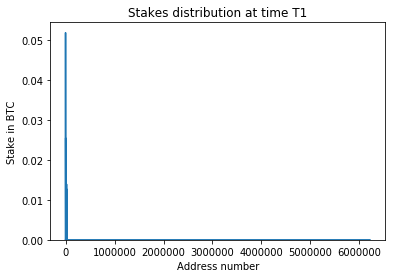

In [23]:
x = range(len(p_stakes[0]))
df = pd.DataFrame({"Stakes at T1": p_stakes[0] }, index=x)
ax = df.plot(legend=False)
ax.set_ylim(0)
ax.set_title("Stakes distribution at time T1")
ax.set_xlabel("Address number")
# ax.set_yscale("log",nonposy="clip")
ax.set_ylabel("Stake in BTC")
# 2010

In [ ]:
x = range(len(p_stakes_h2[0]))
df = pd.DataFrame({"Stakes at T3": p_stakes_h2[3] }, index=x)
ax = df.plot(legend=False)
ax.set_ylim(0)
ax.set_title("Stakes distribution at time T4 H2")
ax.set_xlabel("Address number")
# ax.set_yscale("log",nonposy="clip")
ax.set_ylabel("Stake in BTC")
# 2012

In [ ]:
# Yearly Stakes using Cluster_h2 technique
stakes_t_year_h2 = []
for cluster in tqdm_notebook(clusters_h2.clusters()):
    sub_stake = []
    for height in heights:
        stake = 0
        for script in cluster.scripts:
            stake += script.balance(height)
        sub_stake.append(stake)
    stakes_t_year_h2.append(sub_stake)

In [ ]:
# Compute stakes in terms of probabilities
p_stakes_h2 = []
for i in range(0,len(heights)):
    stake = list(map(lambda x : x[i], stakes_t_year_h2))
    p_stakes_h2.append(np.array(stake) / np.sum(stake))

In [ ]:
# Compute the statistical distance
stat_dists_h2 = []
for i in range(0, len(heights) -1):
    stat_dists_h2.append(0.5 * np.sum(np.absolute(np.array(p_stakes_h2[i]) - np.array(p_stakes_h2[i+1]))))

In [ ]:
stat_dists_h2

# Get monthly stake shifts

In [ ]:
# Get heights of blocks for monthly stake shift computation
T1 = calendar.timegm(datetime(2012,12,31).timetuple())
T2 = calendar.timegm(datetime(2014,1,1).timetuple())
T_blocks_month = chain.filter_blocks(lambda x : x.timestamp > T1 and x.timestamp < T2)
heights = []
months = list(range(1,13))
for blk in T_blocks_month:
    if blk.time.month == months[0]:
        heights.append(blk.height)
        del months[0]
        if len(months) == 0:
            break;

In [ ]:
# Montlhy Stakes using Cluster_h1 technique
stakes_t_month_h1 = []
for cluster in tqdm_notebook(clusters_h1.clusters()):
    sub_stake = []
    for height in heights:
        stake = 0
        for script in cluster.scripts:
            stake += script.balance(height)
        sub_stake.append(stake)
    stakes_t_month_h1.append(sub_stake)

In [ ]:
# Monthly Stakes using Cluster_h2 technique
stakes_t_month_h2 = []
for cluster in tqdm_notebook(clusters_h2.clusters()):
    sub_stake = []
    for height in heights:
        stake = 0
        for script in cluster.scripts:
            stake += script.balance(height)
        sub_stake.append(stake)
    stakes_t_month_h2.append(sub_stake)

In [ ]:
# Compute stakes in terms of probabilities
p_stakes_month_h2 = []
for i in range(0,len(heights)):
    stake = list(map(lambda x : x[i], stakes_t_month_h2))
    p_stakes_month_h2.append(np.array(stake) / np.sum(stake))

In [ ]:
# Compute the statistical distance
stat_dists_month_h2 = []
for i in range(0, len(heights) -1):
    stat_dists_month_h2.append(0.5 * np.sum(np.absolute(np.array(p_stakes_month_h2[i]) - np.array(p_stakes_month_h2[i+1]))))

In [ ]:
btc_prices_loc = os.path.join(os.getcwd(),'btc-2013.csv')
btc_prices = pd.read_csv(btc_prices_loc)


In [ ]:
btc_prices.head(3).index[1]

In [ ]:
datetime.strptime(btc_prices.head(1)['Date'][0],'%Y-%m-%d %X').month

In [ ]:
for lel in btc_prices['Date']:
    print(lel.

In [ ]:
months = list(range(1,13))
idxes = []
for index, row in btc_prices.iterrows():
    if datetime.strptime(row['Date'],'%Y-%m-%d %X').month == months[0]:
        idxes.append(index)
        del months[0]
        if len(months) == 0:
            break;

In [ ]:
import os 

mod_stat_dists = deepcopy(stat_dists_month_h2)
mod_stat_dists.insert(0,0)
x = range(len(mod_stat_dists))
x2 = range(12)
# df = pd.DataFrame({"Stakes at T3": stat_dists_month_h2 }, index=x)

btc_prices_loc = os.path.join(os.getcwd(),'btc-2013.csv')
btc_prices = pd.read_csv(btc_prices_loc)
# btc_prices.iloc[idxes]['Close Price']

df2 = pd.DataFrame({"BTC price": list(btc_prices.iloc[idxes]['Close Price']) }, index=x2)
# btc_prices.iloc[idxes]
# df2

fig, axis1 = plt.subplots()

axis2 = axis1.twinx()
axis1.bar(x, mod_stat_dists)
axis1.set_ylabel("Stake shift")
# axis2.plot(df2,'red')
# axis2.set_ylabel("BTC price in $")
# axis2.set_xticks((x2))
axis2.grid(b=False)
axis1.set_xticks(range(len(mod_stat_dists)))
axis1.set_xticklabels(("Jan","Jan - Feb", "Feb-Mar","Mar-April", "April-May", "May-June", "June-July", "July-Aug", "Aug-Sept","Sept-Oct","Oct-Nov","Nov-Dec"),rotation=45,ha="right")
btc_price_handle = matplotlib.patches.Patch(color='red',label='BTC price in $')
stake_shift_handle = matplotlib.patches.Patch(color='C0',label='Stake shift')
fig.legend(handles=[btc_price_handle,stake_shift_handle])
# axis2.set_ylim(0)
# # btc_prices.head()

# ax = df.plot(legend=False)
# ax.set_ylim(0)
# ax.set_title("Stake shift between months in 2013")
# ax.set_xlabel("Address number")
# # ax.set_xticks("1","2","3","4","5","6","7","8","9","10","11")

# ax.set_xticks(range(len(stat_dists_month_h2)))
# ax.set_xticklabels(("Jan - Feb", "Feb-Mar","Mar-April", "April-May", "May-June", "June-July", "July-Aug", "Aug-Sept","Sept-Oct","Oct-Nov","Nov-Dec"),rotation=45,ha="right")
# # ax.set_yscale("log",nonposy="clip")
# ax.set_ylabel("Stake shift")
# ax.autoscale()

# btc_prices.plot(ax=ax)

# Get weekly stake shifts

In [ ]:
# Get heights of blocks for weekly stake shift computation
T1 = calendar.timegm(datetime(2012,12,31).timetuple())
T2 = calendar.timegm(datetime(2014,1,1).timetuple())
T_blocks_month = chain.filter_blocks(lambda x : x.timestamp > T1 and x.timestamp < T2)
heights = []
weeks = [1,8,15,22,29]
months = [8,9] # Get stakes for every week of months

for blk in T_blocks_month:
    if blk.time.month == months[0]:
        if blk.time.day == weeks[0]:
            heights.append(blk.height)
            del weeks[0]
            if len(weeks) == 0:
                del months[0]
                weeks = [1,8,15,22,29]
                if len(months) == 0:
                    break;

In [ ]:
for blk in T_blocks_month:
    for h in heights : 
        if blk.height == h:
            print(blk.time)

In [ ]:
# Weekly Stakes using Cluster_h2 technique
stakes_t_weeks_h2 = []
for cluster in tqdm_notebook(clusters_h2.clusters()):
    sub_stake = []
    for height in heights:
        stake = 0
        for script in cluster.scripts:
            stake += script.balance(height)
        sub_stake.append(stake)
    stakes_t_weeks_h2.append(sub_stake)

In [ ]:
# Compute stakes in terms of probabilities
p_stakes_week_h2 = []
for i in range(0,len(heights)):
    stake = list(map(lambda x : x[i], stakes_t_weeks_h2))
    p_stakes_week_h2.append(np.array(stake) / np.sum(stake))

In [ ]:
len(p_stakes_week_h2)

In [ ]:
# Compute the statistical distance
stat_dists_week_h2 = []
for i in range(0, len(heights) -1):
    stat_dists_week_h2.append(0.5 * np.sum(np.absolute(np.array(p_stakes_week_h2[i]) - np.array(p_stakes_week_h2[i+1]))))

In [ ]:
stat_dists_week_h2

In [ ]:
import os 
btc_prices_loc = os.path.join(os.getcwd(),'btc-2013.csv')
btc_prices = pd.read_csv(btc_prices_loc)

In [ ]:
# Get BTC price for these weeks
idxes = []
weeks = [1,8,15,22,29]
months = [8,9] # Get stakes for every week of months
for index, row in btc_prices.iterrows():
    row_date = datetime.strptime(row['Date'],'%Y-%m-%d %X')
    if row_date.month == months[0]:
        if row_date.day == weeks[0]:
            idxes.append(index)
            del weeks[0]
            if len(weeks) == 0:
                del months[0]
                weeks = [1,8,15,22,29]
                if len(months) == 0:
                    break;

In [ ]:
weekly_btc_price_10_11 = list(btc_prices.iloc[idxes]['Close Price'])
# Compute the statistical distance
abs_price_diff = []
for i in range(0, len(weekly_btc_price_10_11) -1):
    abs_price_diff.append(np.absolute(weekly_btc_price_10_11[i] - weekly_btc_price_10_11[i+1]))

In [ ]:
btc_prices.iloc[idxes]

In [ ]:
del stat_dists_week_h2[4]
del abs_price_diff[4]

In [ ]:
import os 

# mod_stat_dists = deepcopy(stat_dists_week_h2)
# mod_stat_dists.insert(0,0)
x = range(len(stat_dists_week_h2[0:4]))
x2 = range(len(abs_price_diff[0:4]) )
# df = pd.DataFrame({"Stakes at T3": stat_dists_month_h2 }, index=x)

#         btc_prices_loc = os.path.join(os.getcwd(),'btc-2013.csv')
#         btc_prices = pd.read_csv(btc_prices_loc)
# btc_prices.iloc[idxes]['Close Price']

df2 = pd.DataFrame({"BTC price": np.abs(norm_abs_price_diff[0:4]) }, index=x2)
# btc_prices.iloc[idxes]
# df2

fig, axis1 = plt.subplots()
fig2, axis3 = plt.subplots()

axis2 = axis1.twinx()
axis1.bar(x, np.abs(norm_stat_dists[0:4]))
axis1.set_ylabel("Stake shift")
axis2.bar(x, np.abs(norm_abs_price_diff[0:4]), color='red', alpha=0.4)
axis3.bar(x, np.abs(norm_abs_price_diff[0:4]), color='red', alpha=0.4)

# axis2.bar(x2, stat_dists_week_h2[0:4, color='red', opacity=0.4)

axis2.plot(df2,'red')
# axis2.set_ylabel("BTC price in $")
# axis2.set_xticks((x2))
# axis2.grid(b=False)
# axis1.set_xticks(range(len(mod_stat_dists)))
axis1.set_xticklabels(("NovW1-NovW2", "NovW2-NovW3","NovW3-NovW4", "NovW4-DecW1", "DecW1-DecW2", "DecW2-DecW3", "DecW3-DecW4"),rotation=45,ha="right")
btc_price_handle = matplotlib.patches.Patch(color='red',label='BTC price in $')
stake_shift_handle = matplotlib.patches.Patch(color='C0',label='Stake shift')
fig.legend(handles=[btc_price_handle,stake_shift_handle])


In [ ]:
np.corrcoef(stat_dists_week_h2[0:4], abs_price_diff[0:4])[0,1]

In [ ]:
abs_price_diff[0:2], stat_dists_week_h2[0:2]

In [ ]:
np.corrcoef(norm_abs_price_diff[0:4], norm_stat_dists[0:4])

In [ ]:
(1/(len(abs_price_diff)-1))* np.sum(((np.array(stat_dists_week_h2) - np.mean(stat_dists_week_h2))/np.std(stat_dists_week_h2)) * ((np.array(abs_price_diff) - np.mean(abs_price_diff))/np.std(abs_price_diff)))

In [ ]:
norm_abs_price_diff = (np.array(abs_price_diff) - np.mean(abs_price_diff))/np.std(abs_price_diff)
norm_stat_dists = (np.array(stat_dists_week_h2) - np.mean(stat_dists_week_h2))/np.std(stat_dists_week_h2)

In [ ]:
np.abs(norm_stat_dists)

In [ ]:
norm_abs_price_diff

In [ ]:
pricediff_statdist_df_04 = pd.DataFrame({'abs_price_diff':norm_abs_price_diff[0:4],'stat_dist':norm_stat_dists[0:4]})

In [ ]:
import seaborn as sns
sns.pairplot(data=pricediff_statdist_df_04, x_vars='stat_dist',y_vars='abs_price_diff', size=3)

# Get daily stake shifts

In [ ]:
# Get heights of blocks for weekly stake shift computation
T1 = calendar.timegm(datetime(2012,12,31).timetuple())
T2 = calendar.timegm(datetime(2014,1,1).timetuple())
T_blocks_month = chain.filter_blocks(lambda x : x.timestamp > T1 and x.timestamp < T2)
heights = []
days = list(range(1,32))
month = 11 # December
# months = [11,12] # Get stakes for every week of Nov and Dec

for blk in T_blocks_month:
    if blk.time.month == month:
        if blk.time.day == days[0]:
            heights.append(blk.height)
            del days[0]
            if len(days) == 0:
                break;

In [ ]:
len(T_blocks_month)/1440

In [ ]:
# Daily Stakes using Cluster_h2 technique
stakes_t_days_h2 = []
for cluster in tqdm_notebook(clusters_h2.clusters()):
    sub_stake = []
    for height in heights:
        stake = 0
        for script in cluster.scripts:
            stake += script.balance(height)
        sub_stake.append(stake)
    stakes_t_days_h2.append(sub_stake)

In [ ]:
# Compute stakes in terms of probabilities
p_stakes_day_h2 = []
for i in range(0,len(heights)):
    stake = list(map(lambda x : x[i], stakes_t_days_h2))
    p_stakes_day_h2.append(np.array(stake) / np.sum(stake))

In [ ]:
# Compute the statistical distance
stat_dists_day_h2 = []
for i in range(0, len(heights) -1):
    stat_dists_day_h2.append(0.5 * np.sum(np.absolute(np.array(p_stakes_day_h2[i]) - np.array(p_stakes_day_h2[i+1]))))

In [ ]:
import os
btc_prices_loc = os.path.join(os.getcwd(),'btc-2013.csv')
btc_prices = pd.read_csv(btc_prices_loc)

In [ ]:
# Get BTC price for these days
idxes = []
days = list(range(1,32))# Get stakes for every day of month
month = 12 
for index, row in btc_prices.iterrows():
    row_date = datetime.strptime(row['Date'],'%Y-%m-%d %X')
    if row_date.month == month:
        if row_date.day == days[0]:
            idxes.append(index)
            del days[0]
            if len(days) == 0:
                break;

In [ ]:
daily_btc_price_dec = list(btc_prices.iloc[idxes]['Close Price'])
# Compute the statistical distance
abs_price_diff = []
for i in range(0, len(daily_btc_price_dec) -1):
    abs_price_diff.append(np.absolute(daily_btc_price_dec[i] - daily_btc_price_dec[i+1]))

In [ ]:
s_shift_outliers = [(idx,val) for idx, val in enumerate(stat_dists_day_h2) if val > np.mean(stat_dists_day_h2)]

In [ ]:
s_shift_outliers

In [ ]:
for idx, val in enumerate(abs_price_diff):
#     if idx == 0:
#         print((idx, val, 0))
#     elif idx < len(abs_price_diff)-1:
    print((idx,val, stat_dists_day_h2[idx]))
# [ for idx, val in enumerate(stat_dists_day_h2)]

In [ ]:
[(idx,val) for idx, val in enumerate(abs_price_diff)]

In [ ]:
abs_price_diff[]

In [ ]:
btc_diff_outliers = [abs_price_diff[u] for u in range(len(s_shift_outliers))]

In [ ]:
s_shift_outliers = list(map(lambda x : x[1], s_shift_outliers))

In [ ]:
s_shift_outliers[1:]

In [ ]:
np.corrcoef(stat_dists_day_h2[], btc_diff_outliers)[0,1]

In [ ]:

# mod_stat_dists = deepcopy(stat_dists_day_h2)
# mod_stat_dists.insert(0,0)
# x = range(1,len(mod_stat_dists) +1)
x = range(1,len(stat_dists_day_h2)+1)

# x2 = range(1, len(mod_stat_dists)+1 )
# df = pd.DataFrame({"Stakes at T3": stat_dists_month_h2 }, index=x)

#         btc_prices_loc = os.path.join(os.getcwd(),'btc-2013.csv')
#         btc_prices = pd.read_csv(btc_prices_loc)
# btc_prices.iloc[idxes]['Close Price']

df2 = pd.DataFrame({"BTC price": abs_price_diff }, index=x)
# btc_prices.iloc[idxes]
# df2

fig, axis1 = plt.subplots()
# fig2, axis2 = plt.subplots()

axis2 = axis1.twinx()
axis1.bar(x, stat_dists_day_h2, align='center', width=0.8)
axis1.set_ylabel("Stake shift")
axis1.set_xlabel("Days of the month")
axis2.bar(x, abs_price_diff, color='red', alpha=0.4)
# axis2.plot(df2,'red')
axis2.set_ylabel("BTC price in $")
axis2.set_xticks((x))
# axis2.grid(b=False)
axis1.set_xticks(x)
axis1.set_xticklabels((x),rotation=45)
# axis1.set_xticklabels(("","NovW1-NovW2", "NovW2-NovW3","NovW3-NovW4", "NovW4-DecW1", "DecW1-DecW2", "DecW2-DecW3", "DecW3-DecW4"),rotation=45,ha="right")
btc_price_handle = matplotlib.patches.Patch(color='red',label='Abs BTC price change', alpha=0.4)
stake_shift_handle = matplotlib.patches.Patch(color='C0',label='Stake shift')
fig.legend(handles=[btc_price_handle,stake_shift_handle])


In [ ]:
np.std(stat_dists_day_h2)

In [ ]:
np.var(stat_dists_day_h2)

In [ ]:
np.mean(stat_dists_day_h2)

# Get hourly stake shift

In [ ]:
# Get heights of blocks for daily stake shift computation
T1 = calendar.timegm(datetime(2013,12,15).timetuple())
T2 = calendar.timegm(datetime(2013,12,16).timetuple())
T_blocks_day = chain.filter_blocks(lambda x : x.timestamp > T1 and x.timestamp < T2)
heights = []
hours = list(range(0,24))
for blk in T_blocks_day:
    if blk.time.hour == hours[0]:
        heights.append(blk.height)
        del hours[0]
        if len(hours) == 0:
            break;

In [ ]:
len(T_blocks_hourly), len(heights)

In [ ]:
for blk in T_blocks_day:
    for h in heights : 
        if blk.height == h:
            print(blk.time)

In [ ]:
# Daily Stakes using Cluster_h2 technique
stakes_t_hours_h2 = []
for cluster in tqdm_notebook(clusters_h2.clusters()):
    sub_stake = []
    for height in heights:
        stake = 0
        for script in cluster.scripts:
            stake += script.balance(height)
        sub_stake.append(stake)
    stakes_t_hours_h2.append(sub_stake)

In [ ]:
# Compute stakes in terms of probabilities
p_stakes_hour_h2 = []
for i in range(0,len(heights)):
    stake = list(map(lambda x : x[i], stakes_t_hours_h2))
    p_stakes_hour_h2.append(np.array(stake) / np.sum(stake))

In [ ]:
# Compute the statistical distance
stat_dists_hour_h2 = []
for i in range(0, len(heights) -1):
    stat_dists_hour_h2.append(0.5 * np.sum(np.absolute(np.array(p_stakes_hour_h2[i]) - np.array(p_stakes_hour_h2[i+1]))))

In [ ]:
import os
btc_prices_loc = os.path.join(os.getcwd(),'btc-15-dec.csv')
btc_prices = pd.read_csv(btc_prices_loc)

In [ ]:
# Get BTC price for these hours
idxes = []
hours = list(range(0,24))# Get stakes for every hour

day = 15
month = 12
year = 2013

for index, row in btc_prices.iterrows():
    row_date = datetime.strptime(row['Date'],'%Y-%m-%d %X')
    if row_date.month == month and row_date.day == day and row_date.year == year:
        if row_date.hour == hours[0]:
            idxes.append(index)
            del hours[0]
            if len(hours) == 0:
                break;

In [ ]:
hourly_btc_price_15dec = list(btc_prices.iloc[idxes]['Close Price'])
# Compute the statistical distance
abs_price_diff = []
for i in range(0, len(hourly_btc_price_15dec) -1):
    abs_price_diff.append(np.absolute(hourly_btc_price_15dec[i] - hourly_btc_price_15dec[i+1]))

In [ ]:

# mod_stat_dists = deepcopy(stat_dists_day_h2)
# mod_stat_dists.insert(0,0)
# x = range(1,len(mod_stat_dists) +1)
x = range(0,len(stat_dists_hour_h2))

# x2 = range(1, len(mod_stat_dists)+1 )
# df = pd.DataFrame({"Stakes at T3": stat_dists_month_h2 }, index=x)

#         btc_prices_loc = os.path.join(os.getcwd(),'btc-2013.csv')
#         btc_prices = pd.read_csv(btc_prices_loc)
# btc_prices.iloc[idxes]['Close Price']

df2 = pd.DataFrame({"BTC price": abs_price_diff }, index=x)
# btc_prices.iloc[idxes]
# df2

fig, axis1 = plt.subplots()
# fig2, axis2 = plt.subplots()

axis2 = axis1.twinx()
axis1.bar(x, stat_dists_hour_h2, align='center', width=0.8)
axis1.set_ylabel("Stake shift")
axis1.set_xlabel("Hours")
axis2.bar(x, abs_price_diff, color='red', alpha=0.4)
# axis2.plot(df2,'red')
axis2.set_ylabel("BTC price in $")
axis2.set_xticks((x))
# axis2.grid(b=False)
axis1.set_xticks(x)
axis1.set_xticklabels((x),rotation=45)
# axis1.set_xticklabels(("","NovW1-NovW2", "NovW2-NovW3","NovW3-NovW4", "NovW4-DecW1", "DecW1-DecW2", "DecW2-DecW3", "DecW3-DecW4"),rotation=45,ha="right")
btc_price_handle = matplotlib.patches.Patch(color='red',label='Abs BTC price change', alpha=0.4)
stake_shift_handle = matplotlib.patches.Patch(color='C0',label='Stake shift')
fig.legend(handles=[btc_price_handle,stake_shift_handle])

In [ ]:
np.corrcoef(stat_dis, abs_price_diff)[0,1]

In [ ]:
(1/(len(abs_price_diff)-1))* np.sum(((np.array(stat_dists_hour_h2) - np.mean(stat_dists_hour_h2))/np.std(stat_dists_hour_h2)) * ((np.array(abs_price_diff) - np.mean(abs_price_diff))/np.std(abs_price_diff)))

In [ ]:
np.corrcoef(stat_dists_hour_h2,abs_price_diff)[0,1]